<a href="https://colab.research.google.com/github/natalia-maler/Classification-Regression-Data-Analysis-Projects/blob/main/Projekt1(klasyfikacja).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KLASYFIKACJA

 Program do obliczeń budowania i oceny modeli predykcyjnych

Import wymaganych bibliotek

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import RandomForestClassifier

#1. Wczytanie danych

In [ ]:
# Przykładowe wczytanie danych (Titanic)
url='titanic.csv'
data = pd.read_csv(url)
data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


###Wyjaśnienie kolumn ze zbioru Titanic

Ten zbiór danych zawiera informacje o pasażerach statku, którzy podróżowali w 1912 roku.

Kolumna:

- Survived - oznacza czy pasażer przeżył: 1=Tak, 0=Nie
- Pclass - klasa podróży pasażera: 1,2,3
- Sex - informacja o płci: male, female
- Age - wiek pasażera
- Sibsp - liczba rodzeństwa i małżonków pasażera na pokładzie
- Parch - liczba rodziców i dzieci pasażera na pokładzie
- Fare - cena biletu
- Embarked - port wejścia na statek: C, Q, S
- Class - klasa podróży w formie opisowej: First, Second, Third
- Who - uproszczony opis osoby: man, woman, child
- Adult_male - czy pasażer jest dorosłym mężczyzną: true, false
- Deck - podkład: A-G
- Embark_town - miasto, w którym pasażer zaokrętował: Cherbourg, Queenstown, Southampton  
- Alive - czy pasażer żyje: yes, no
- Alone - czy pasażer podróżował sam: true, false

In [ ]:
# Pokazanie wszystkich kolumn w jednym wierszu
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

#2. Eksploracja danych

In [ ]:
# podstawowe statystyki
print("\nTypy kolumn:")
print(data.info())

# Statystyki opisowe
def summary_statistics(data):
  numeric_data = data.select_dtypes(include=['int64', 'float64']) # kolumny numeryczne
  stats = pd.DataFrame({
      'mean': numeric_data.mean(),
      'median': numeric_data.median(),
      'std': numeric_data.std(),
      'min': numeric_data.min(),
      'max': numeric_data.max()
  })
  return stats

print("\nStatystyki opisowe:")
print(summary_statistics(data))


Typy kolumn:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None

Statystyki opisowe:
               mean   median        std   min       max
survived   0.

In [ ]:
# analiza braków danych

print("Ilosc rekordów:",len(data))
print("\nAnaliza braków danych:")
print(data.isnull().sum())

# najwięcej braków danych występuje w kolumnie deck - 688, age - 177, embarked - 2, embark_town - 2

Ilosc rekordów: 891

Analiza braków danych:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


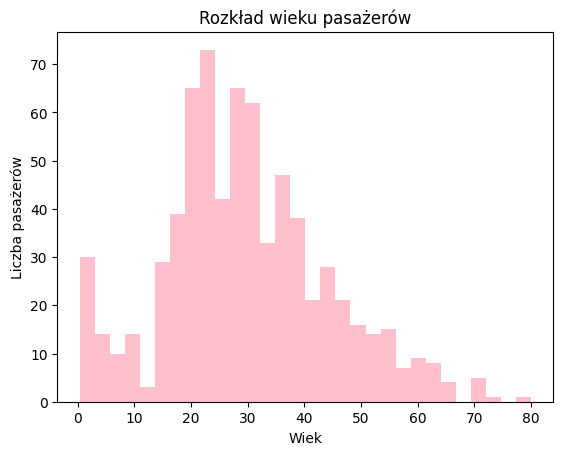

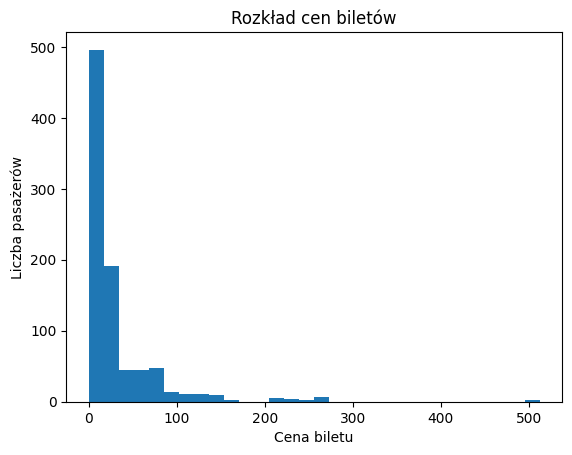

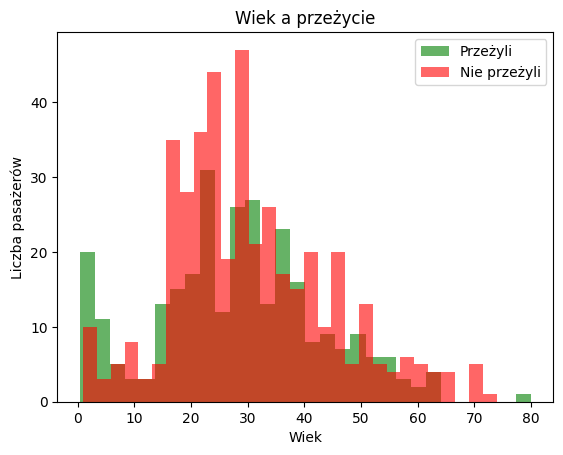

In [ ]:
# Przykładowe histogramy, wykresy punktowe, korelacje między zmiennymi

# histogram wieku
plt.figure()
plt.hist(data['age'].dropna(), bins=30, color='pink')
plt.xlabel("Wiek")
plt.ylabel("Liczba pasażerów")
plt.title("Rozkład wieku pasażerów")
plt.show()

#cena biletu a liczba pasażerów
plt.figure()
plt.hist(data['fare'], bins=30)
plt.xlabel("Cena biletu")
plt.ylabel("Liczba pasażerów")
plt.title("Rozkład cen biletów")
plt.show()

# histogram wieku z podziałem na przeżycie
plt.figure()
plt.hist(data[data['survived'] == 1]['age'], bins=30, alpha=0.6, label='Przeżyli', color='g')
plt.hist(data[data['survived'] == 0]['age'], bins=30, alpha=0.6, label='Nie przeżyli',color='r')
plt.xlabel("Wiek")
plt.ylabel("Liczba pasażerów")
plt.title("Wiek a przeżycie")
plt.legend()
plt.show()


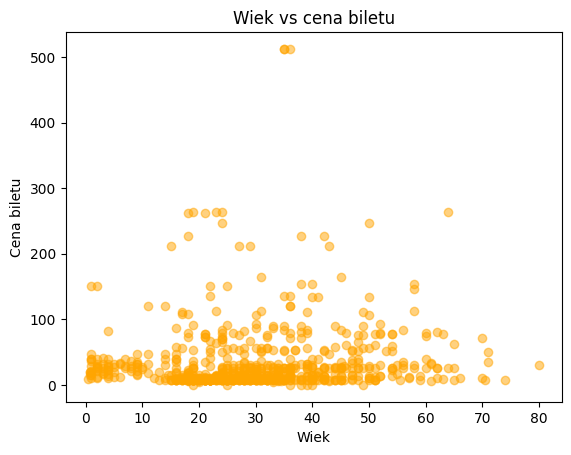

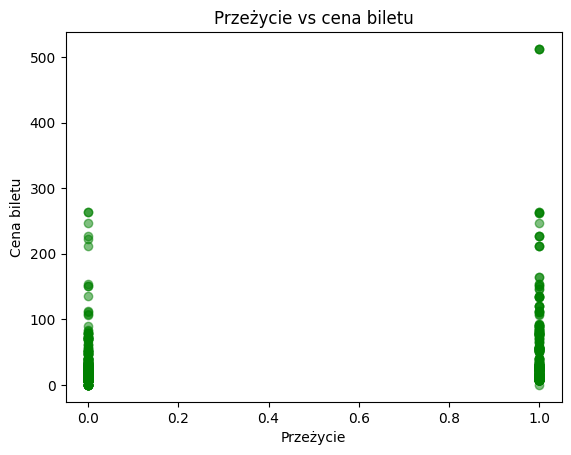

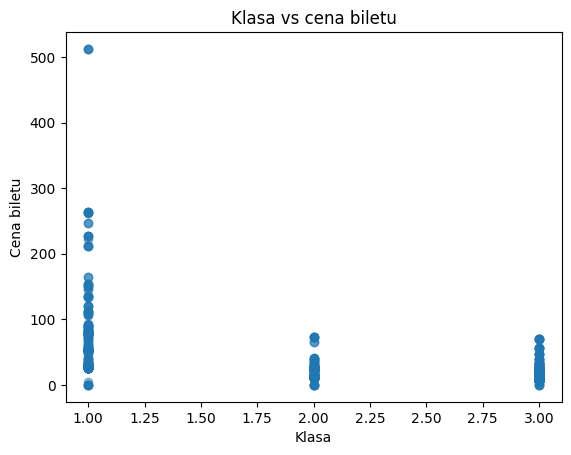

In [ ]:
# wykresy punktowe

# wiek a cena biletu
plt.figure()
plt.scatter(data['age'], data['fare'], alpha=0.5, color='orange')
plt.xlabel("Wiek")
plt.ylabel("Cena biletu")
plt.title("Wiek vs cena biletu")
plt.show()


# survived a fare(cena)
plt.figure()
plt.scatter(data['survived'], data['fare'], alpha=0.5, color='green')
plt.xlabel("Przeżycie")
plt.ylabel("Cena biletu")
plt.title("Przeżycie vs cena biletu")
plt.show()

# pclass a fare
plt.figure()
plt.scatter(data['pclass'], data['fare'], alpha=0.5)
plt.xlabel("Klasa")
plt.ylabel("Cena biletu")
plt.title("Klasa vs cena biletu")
plt.show()

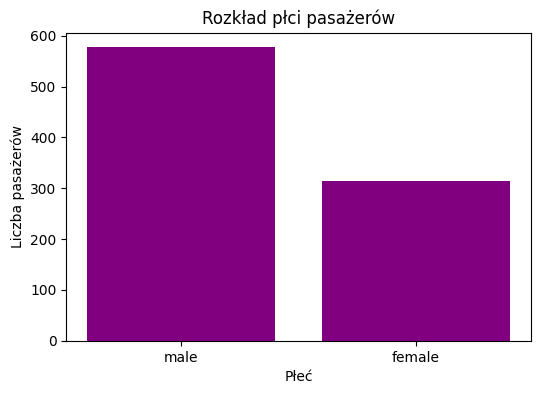

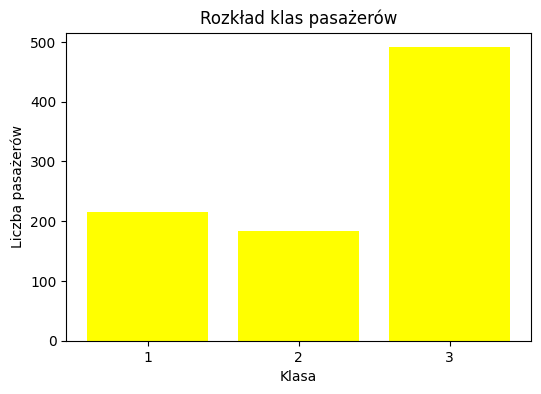

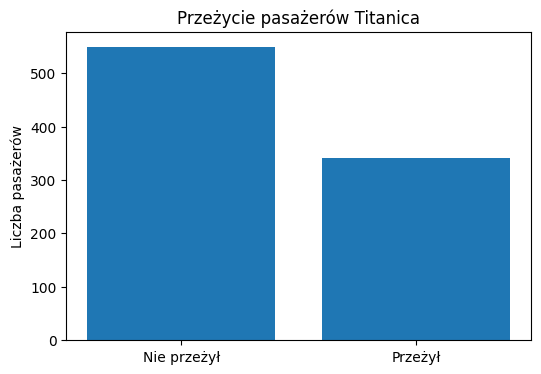

In [ ]:
# wykresy dla zmiennych kategorycznych – pokazują liczność kategorii

counts = data['sex'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values, color='purple')
plt.xlabel("Płeć")
plt.ylabel("Liczba pasażerów")
plt.title("Rozkład płci pasażerów")
plt.show() # Pokazuje, że na pokładzie było więcej mężczyzn niż kobiet

# pclass (klasa pasażera)
counts = data['pclass'].value_counts().sort_index()
plt.figure(figsize=(6,4))
plt.bar(counts.index.astype(str), counts.values,color='yellow')
plt.xlabel("Klasa")
plt.ylabel("Liczba pasażerów")
plt.title("Rozkład klas pasażerów")
plt.show()

# przeżycie
counts = data['survived'].value_counts().sort_index()
plt.figure(figsize=(6,4))
plt.bar(['Nie przeżył', 'Przeżył'], counts.values)
plt.ylabel("Liczba pasażerów")
plt.title("Przeżycie pasażerów Titanica")
plt.show()

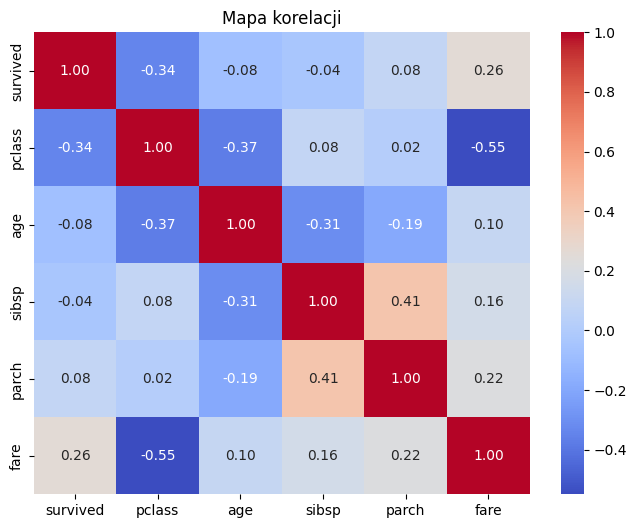

In [ ]:
# Korelacje między zmiennymi numerycznymi
numeric_cols = data.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(8,6))
sns.heatmap( correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa korelacji")
plt.show()

# 3. Przygotowanie danych do dalszej analizy:


In [ ]:
# analiza braków danych
print("Analiza braków danych:")
print(data.isnull().sum())

Analiza braków danych:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
# funkcja do czyszczenia za pomocą import
def clean_data(data):
   # Imputacja braków danych dla zmiennych numerycznych
   numeric_cols = data.select_dtypes(include=np.number).columns
   imputer_num = SimpleImputer(strategy="mean") # zastępujemy średnią
   data[numeric_cols] = imputer_num.fit_transform(data[numeric_cols])

   # Imputacja braków danych dla zmiennych kategorialnych
   categorical_cols = data.select_dtypes(include='object').columns
   imputer_cat = SimpleImputer(strategy="most_frequent") # wartości najczęsciej powtarzające się
   data[categorical_cols] = imputer_cat.fit_transform(data[categorical_cols])

   return data

# czyszczenie danych
data_cleaned = clean_data(data)
print(data_cleaned.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


In [ ]:
#zakoduj zmienne kategoryczne (jeśli występują)

# kopia danych
data_prepared = data_cleaned.copy()

# pokazanie kolumn: kategoryczne  i numeryczne
category_cols = data_prepared.select_dtypes(include=['object']).columns.tolist()
numeric_cols = data_prepared.select_dtypes(include=['int64','float64']).columns.tolist()

# usuniecie zmniennej docelowej - survived, oraz alive bo duplikacja informacji
numeric_cols.remove('survived')
category_cols.remove('alive')

print("Kolumny kategoryczne:", category_cols)
print("Kolumny numeryczne:", numeric_cols)

Kolumny kategoryczne: ['sex', 'embarked', 'class', 'who', 'deck', 'embark_town']
Kolumny numeryczne: ['pclass', 'age', 'sibsp', 'parch', 'fare']


In [ ]:
# One-Hot Encoding - tylko kategoryczne
encoder = OneHotEncoder(drop='first', sparse_output=False)
category_encoded = encoder.fit_transform(data_prepared[category_cols])
category_encoded_df = pd.DataFrame(category_encoded, columns=encoder.get_feature_names_out(category_cols), index=data_prepared.index)
print(category_encoded_df.head(10))

# Usunięcie oryginalnych kolumn kategorycznych, w celu standaryzacji danych numerycznych
data_prepared = data_prepared.drop(columns=category_cols)

   sex_male  embarked_Q  embarked_S  class_Second  class_Third  who_man  who_woman  deck_B  deck_C  deck_D  deck_E  deck_F  deck_G  embark_town_Queenstown  embark_town_Southampton
0       1.0         0.0         1.0           0.0          1.0      1.0        0.0     0.0     1.0     0.0     0.0     0.0     0.0                     0.0                      1.0
1       0.0         0.0         0.0           0.0          0.0      0.0        1.0     0.0     1.0     0.0     0.0     0.0     0.0                     0.0                      0.0
2       0.0         0.0         1.0           0.0          1.0      0.0        1.0     0.0     1.0     0.0     0.0     0.0     0.0                     0.0                      1.0
3       0.0         0.0         1.0           0.0          0.0      0.0        1.0     0.0     1.0     0.0     0.0     0.0     0.0                     0.0                      1.0
4       1.0         0.0         1.0           0.0          1.0      1.0        0.0     0.0     1.0  

In [ ]:
# standaryzacja danych numerycznych
scaler = StandardScaler()
data_prepared[numeric_cols] = scaler.fit_transform(data_prepared[numeric_cols])
print(data_prepared.head())

   survived    pclass       age     sibsp     parch      fare  adult_male alive  alone
0       0.0  0.827377 -0.592481  0.432793 -0.473674 -0.502445        True    no  False
1       1.0 -1.566107  0.638789  0.432793 -0.473674  0.786845       False   yes  False
2       1.0  0.827377 -0.284663 -0.474545 -0.473674 -0.488854       False   yes   True
3       1.0 -1.566107  0.407926  0.432793 -0.473674  0.420730       False   yes  False
4       0.0  0.827377  0.407926 -0.474545 -0.473674 -0.486337        True    no   True


In [ ]:
# Połączenie danych
data_finally = pd.concat([data_prepared, category_encoded_df], axis = 1)
print("Dane po kodowaniu i standaryzacji:")
print(data_finally.head())

Dane po kodowaniu i standaryzacji:
   survived    pclass       age     sibsp     parch      fare  adult_male alive  alone  sex_male  embarked_Q  embarked_S  class_Second  class_Third  who_man  who_woman  deck_B  deck_C  deck_D  deck_E  deck_F  deck_G  embark_town_Queenstown  embark_town_Southampton
0       0.0  0.827377 -0.592481  0.432793 -0.473674 -0.502445        True    no  False       1.0         0.0         1.0           0.0          1.0      1.0        0.0     0.0     1.0     0.0     0.0     0.0     0.0                     0.0                      1.0
1       1.0 -1.566107  0.638789  0.432793 -0.473674  0.786845       False   yes  False       0.0         0.0         0.0           0.0          0.0      0.0        1.0     0.0     1.0     0.0     0.0     0.0     0.0                     0.0                      0.0
2       1.0  0.827377 -0.284663 -0.474545 -0.473674 -0.488854       False   yes   True       0.0         0.0         1.0           0.0          1.0      0.0        1.0   

Rozdzielenie na zbiór treningowy i testowy.

In [ ]:
# usuwamy też alive - bo dubluje survived
X = data_finally.drop(columns=['survived','alive'])
y = data_finally['survived']

# Rozdzielenie na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)

print("Rozmiar zbioru treningowego:", X_train.shape, y_train.shape)
print("Rozmiar zbioru testowego:", X_test.shape, y_test.shape)

Rozmiar zbioru treningowego: (712, 22) (712,)
Rozmiar zbioru testowego: (179, 22) (179,)


# 4.Budowa modelu predykcyjnego


Wybrany model predykcyjny to Random Forest

In [ ]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100,max_depth=5,min_samples_split=10,min_samples_leaf=5)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
#Uzasadnienie:
# W niniejszym projekcie zdecydowałąm się na zastosowanie algorytmu Random Forest ze względu na jego wysoką
# skuteczność predykcyjną oraz odporność na typowe problemy występujące w modelach opartych na pojedynczych drzewach decyzyjnych.

# Random Forest redukuje overfitting, który może wystąpić w pojedynczych drzewach decyzyjnych.
# Dobrze radzi sobie z cechami numerycznymi i zakodowanymi kategorycznymi.
# Automatycznie robi uśrednianie wyników z wielu drzew, stabilniejsze predykcje.
# Lasy losowe są stosunkowo szybkie w trenowaniu, choć mogą być zasobożerne.

# 5.Ocena jakość modelu


In [ ]:
accuracy = accuracy_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print("Dokładność:",accuracy)
print("F1:",f1)

# Pełny raport klasyfikacji
print("\nRaport klasyfikacji:")
print(classification_report(y_test, y_pred_rf))

Dokładność: 0.8100558659217877
F1: 0.711864406779661

Raport klasyfikacji:
              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86       110
         1.0       0.86      0.61      0.71        69

    accuracy                           0.81       179
   macro avg       0.82      0.77      0.79       179
weighted avg       0.82      0.81      0.80       179



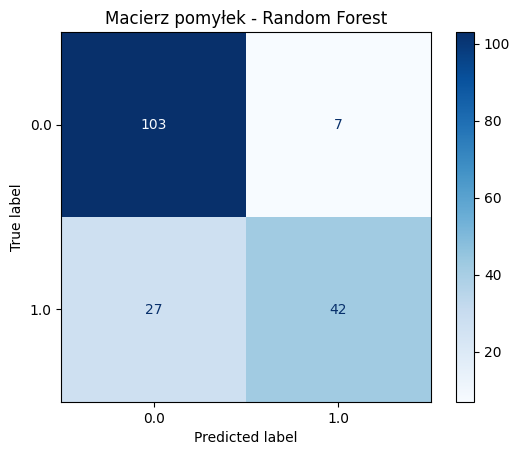

In [ ]:
# macierz pomyłek
ConfusionMatrixDisplay.from_estimator(rf_model,X_test,y_test,cmap=plt.cm.Blues,values_format='d')
plt.title("Macierz pomyłek - Random Forest")
plt.show()

#6. Wnioski

Jakość modelu

Model Random Forest osiągnął accuracy około 0.81 i F1-score około 0.71 dla klasy 1, czyli ci którzy przeżyli.

Oznacza to, że 81% wszystkich przypadków zostało poprawnie sklasyfikowanych.

Model dobrze przewiduje klasę większościową 'nie przeżył' – wysoki recall (0.94) i wysoka F1 (0.86).

Dla klasy mniejszościowej 'przeżył' recall jest niższy (0.61), co oznacza, że część 'przeżyłych' nie została poprawnie wykryta.

Przydatność modelu

Model jest dobry do przewidywania ogólnej tendencji – kto najprawdopodobniej przeżył lub zmarł, szczególnie dla klasy większościowej.

Random Forest jest stabilny i mniej wrażliwy na wartości odstające w danych, dobrze radzi sobie z dużą liczbą cech numerycznych i jak zakodowanych kategorycznych.

Może być wykorzystany w analizach wstępnych, do wspomagania decyzji lub klasyfikacji ryzyka.

Umożliwia łatwą interpretację wyników, gdyż oferuje miarę ważności cech użytych do przewidywań.

Ograniczenia zastosowanego podejścia

Problemy z klasą mniejszościową, czyli dla kategorii 'przeżyli' - model nie wychwytuje wszystkich przeżyłych (False Negatives).
W praktyce może być niebezpieczne, jeśli celem jest wykrycie wszystkich przypadków klasy 1.

Kolejnym ograniczeniem jest mniejsza interpretowalność w porównaniu do prostych modeli liniowych. Chociaż algorytm udostępnia miary ważności cech, nie pozwala on na jednoznaczne wyjaśnienie pojedynczych decyzji modelu.

Choć Random Forest jest bardziej odporny na overfitting niż pojedyncze drzewa decyzyjne, przy nieodpowiednim doborze hiperparametrów np. zbyt dużej liczbie drzew lub zbyt dużej głębokości może nadal dochodzić do częściowego przeuczenia modelu, zwłaszcza w przypadku małych zbiorów danych.
Parametry takie jak max_depth, min_samples_split czy n_estimators znacząco wpływają na wynik.

Dodatkowo Random Forest charakteryzuje się wyższą złożonością obliczeniową, co skutkuje większym zapotrzebowaniem na zasoby obliczeniowe, szczególnie przy dużej liczbie drzew i cech.

# 7. Projekt w postaci pliku .html


In [ ]:
# raport zapisujący się do pliku .html

#Dane modelu Random Forest
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)


#lista kolumn numerycznych i kategorycznych
numeric_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

#Dane po standaryzacji
data_standardized_preview = data_prepared.head()

# Funkcja generująca raport html
def generate_html_report_rf_extended(data_summary, rf_metrics, numeric_cols, categorical_cols, standardized_preview, output_file="raport_projekt1.html"):
    html_content = f"""
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Raport Random Forest</title>
        <style>
            body {{ font-family: Helvetica, sans-serif; margin: 20px; }}
            h1, h2 {{ color: #4169E1; }}
            table {{ width: 100%; border-collapse: collapse; margin-bottom: 20px; }}
            th, td {{ border: 1px solid #ddd; padding: 8px; text-align: center; }}
            th {{ background-color: #f4f4f4; }}
        </style>
    </head>
    <body>
        <h1>Raport projektu - Titanic, model: Random Forest</h1>
    """

    # Eksploracja danych
    for section_name, df in data_summary.items():
        html_content += f"<h3>{section_name}</h3>"
        html_content += df.to_html(classes="dataframe", border=0, index=False)

    # Kolumny numeryczne i kategoryczne
    html_content += "<h3>Kolumny numeryczne</h3>"
    html_content += "<ul>" + "".join([f"<li>{col}</li>" for col in numeric_cols]) + "</ul>"
    html_content += "<h3>Kolumny kategoryczne</h3>"
    html_content += "<ul>" + "".join([f"<li>{col}</li>" for col in categorical_cols]) + "</ul>"

    # Dane po standaryzacji
    html_content += "<h3>Dane po standaryzacji (podgląd 5 wierszy)</h3>"
    html_content += standardized_preview.to_html(classes="dataframe", border=0, index=False)

    # Metryki Random Forest
    html_content += "<h3>2. Ocena modelu Random Forest</h2>"
    html_content += rf_metrics.to_frame().T.to_html(classes="dataframe", border=0, index=False)

    html_content += """
    </body>
    </html>
    """

    # Zapis pliku
    with open(output_file, "w", encoding="utf-8") as file:
        file.write(html_content)
    print(f"Raport HTML zapisano jako: {output_file}")


#Eksploracja danych
data_summary = {"Podstawowe statystyki": data.describe().T.reset_index().rename(columns={"index":"Kolumna"})}

#Metryki Random Forest
rf_metrics = pd.Series({
    "Accuracy": acc_rf,
    "Precision": precision_rf,
    "Recall": recall_rf,
    "F1-Score": f1_rf
})

#Generowanie raportu
generate_html_report_rf_extended(data_summary, rf_metrics, numeric_cols, categorical_cols, data_standardized_preview)


Raport HTML zapisano jako: raport_projekt1.html
